In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset

train = pd.read_csv('D:\ML project\Black Friday\Train.csv')
test = pd.read_csv('D:\ML project\Black Friday\Test.csv')


In [19]:
X = train.iloc[: , 2:11].values
Y = train.iloc[:, 11].values
X_test = test.iloc[: , 2:11].values

In [17]:
#statistical summary
print(train.describe())

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5

In [20]:
# Applying Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:,0])
X[:, 1] = labelencoder_X.fit_transform(X[:,1])
X[:, 3] = labelencoder_X.fit_transform(X[:,3])
X[:, 4] = labelencoder_X.fit_transform(X[:,4])

In [21]:
# Label Encoder for test data

X_test[:, 0] = labelencoder_X.fit_transform(X_test[:,0])
X_test[:, 1] = labelencoder_X.fit_transform(X_test[:,1])
X_test[:, 3] = labelencoder_X.fit_transform(X_test[:,3])
X_test[:, 4] = labelencoder_X.fit_transform(X_test[:,4])

In [22]:
# Filling NaN values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
imputer = imputer.fit(X[:, 2:11])
imputert = imputer.fit(X_test[:, 2:11])
X[:, 2:11] = imputer.transform(X[:,2:11])
X_test[:, 2:11] = imputert.transform(X_test[:,2:11])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023809CF5CC0>,
      dtype=object)

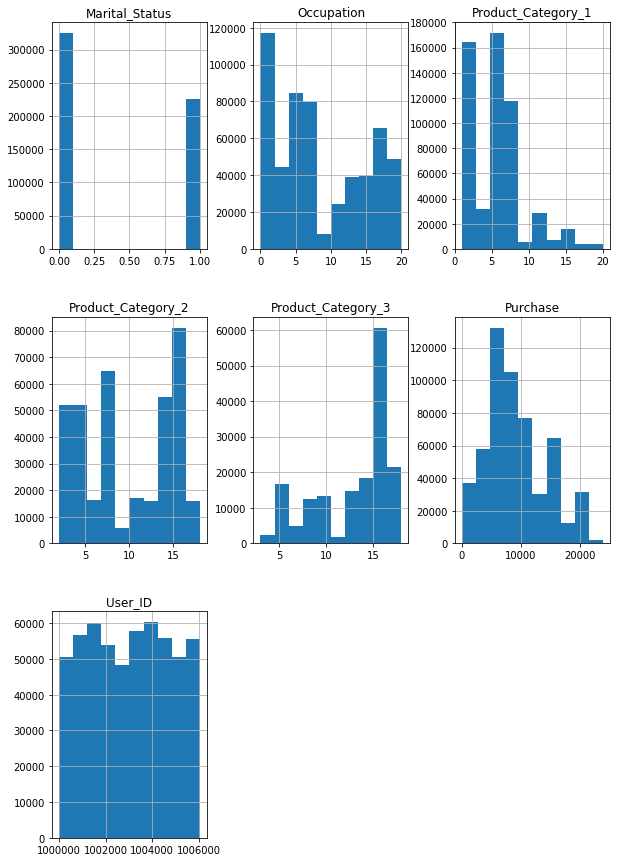

In [23]:
#Ploting graphs
plt.rcParams['figure.figsize'] = (10,15)
train.hist()

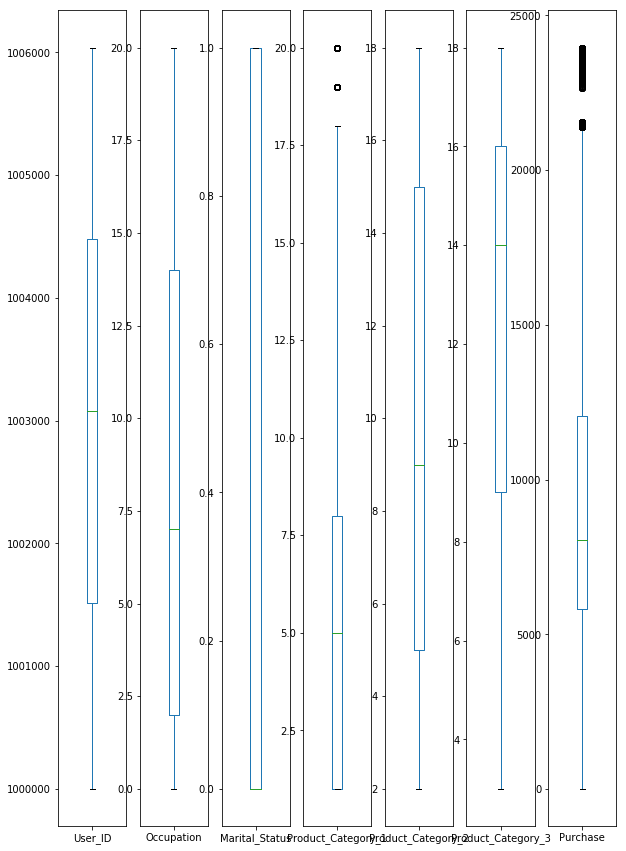

In [24]:
train.plot(kind='box', subplots=True,  sharex=False, sharey=False)
plt.show()

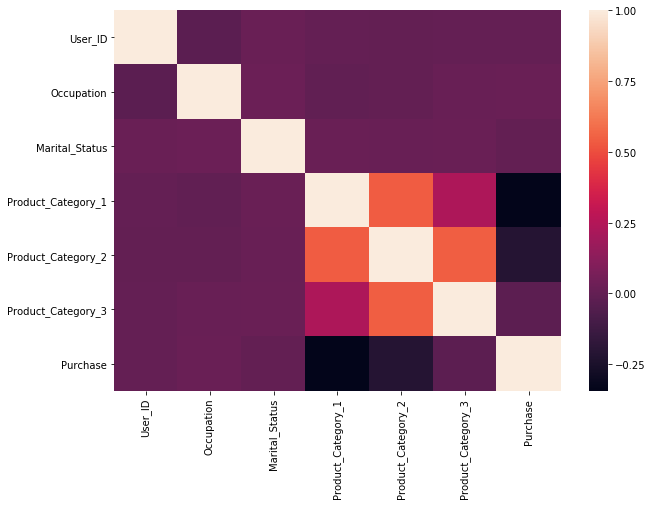

In [25]:
#seaborn plot
plt.figure(figsize = (10,7))
sns.heatmap(train.corr())

In [27]:
#applying algos
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor()
classifier.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
Y_pred = classifier.predict(X_test)

In [29]:
Y_pred

array([19335.60588235, 10651.52333333,  8379.05733225, ...,
       14363.2       , 19027.7       ,  2389.115     ])

In [31]:
prediction = pd.DataFrame(Y_pred, columns=['Y_pred']).to_csv('blackman.csv')